Lambda School Data Science

*Unit 4, Sprint 2, Module 4*

---

# Neural Network Frameworks (Prepare)

## Learning Objectives
* <a href="#p1">Part 1</a>: Implement Regularization Strategies
* <a href="#p2">Part 2</a>: Deploy a Keras Model
* <a href="#p3">Part 3</a>: Write a Custom Callback Function (Optional)

Today's class will also focus heavily on Callback objects. We will use a variety of callbacks to monitor and manipulate our models based on data that our model produces at the end of an epoch.

> A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc). -- [Keras Documentation](https://keras.io/api/callbacks/)

# Regularization Strategies (Learn)

## Overview

Neural Networks are highly parameterized models and can be easily overfit to the training data. The most salient way to combat this problem is with regularization strategies.  

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Regularization.svg/1920px-Regularization.svg.png)

There are four common ways of regularization in neural networks which we cover briefly. Here's a quick summary of how to apply them: 

1. Always use EarlyStopping. This strategy will prevent your weights from being updated well past the point of their peak usefulness.
2. Use EarlyStopping, Weight Decay and Dropout
3. Use EarlyStopping, Weight Constraint and Dropout
4. Also think about the architecture (number of layers, neurons) - determines number of parameters, which is the basis of overfitting - but even "small" neural nets can be complicated and overfit!

Weight Decay and Weigh Constraint accomplish similar purposes - preventing over fitting the parameters by regularizing the values. The mechanics are just slightly different. That's why you would not necessary want to apply them together.

## Follow Along

### Early Stopping

In [1]:
%load_ext tensorboard

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


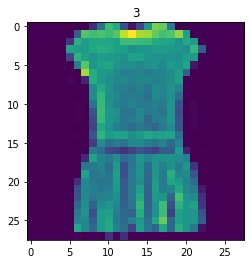

In [3]:
import matplotlib.pyplot as plt

plt.title(y_train[3])
plt.imshow(X_train[3]);

In [4]:
X_train, X_test = X_train / 255., X_test / 255.

In [5]:
28 * 28  # Same feature size as MNIST

784

In [6]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import ReLU
import tensorflow as tf
import os

logdir = os.path.join("logs", "EarlyStopping-Loss")

tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3)

model = tf.keras.Sequential([
    Flatten(input_shape=(28,28)),  # Treats as 784x1
    Dense(128),
    ReLU(negative_slope=.01),
    Dense(128),
    ReLU(negative_slope=.01),
    Dense(128),
    ReLU(negative_slope=.01),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=99, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])

Epoch 1/99
   1/1875 [..............................] - ETA: 0s - loss: 2.3693 - accuracy: 0.0938WARNING:tensorflow:From /home/dondreojordan/Lambda/Unit4/Sprint2/Sprint2/lib/python3.6/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4760 - accuracy: 0.8268 - val_loss: 0.4290 - val_accuracy: 0.8407
Epoch 2/99
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3550 - accuracy: 0.8684 - val_loss: 0.3823 - val_accuracy: 0.8664
Epoch 3/99
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3209 - accuracy: 0.8813 - val_loss: 0.3533 - val_accuracy: 0.8720
Epoch 4/99
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2980 - accuracy: 0.8889 - val_loss: 0.3559 - val_accuracy: 0.8723
Epoch 5/99
1875/1875 [

### Weight Decay

```python
Dense(64, input_dim=64,
            kernel_regularizer=regularizers.l2(0.01),
            activity_regularizer=regularizers.l1(0.01)))
```

In [7]:
from tensorflow.keras import regularizers

logdir = os.path.join("logs", "EarlyStopping+L2_WeightDecay")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3)

model = tf.keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512, kernel_regularizer=regularizers.l2(0.01)),
    ReLU(negative_slope=.01),
    Dense(512, kernel_regularizer=regularizers.l2(0.01)),
    ReLU(negative_slope=.01),
    Dense(512, kernel_regularizer=regularizers.l2(0.01)),
    ReLU(negative_slope=.01),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=99, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])

Epoch 1/99
1875/1875 [==============================] - 34s 18ms/step - loss: 1.3283 - accuracy: 0.7696 - val_loss: 0.7589 - val_accuracy: 0.8033
Epoch 2/99
1875/1875 [==============================] - 31s 17ms/step - loss: 0.7073 - accuracy: 0.8139 - val_loss: 0.6749 - val_accuracy: 0.8198
Epoch 3/99
1875/1875 [==============================] - 32s 17ms/step - loss: 0.6497 - accuracy: 0.8272 - val_loss: 0.6389 - val_accuracy: 0.8284
Epoch 4/99
1875/1875 [==============================] - 32s 17ms/step - loss: 0.6252 - accuracy: 0.8335 - val_loss: 0.6329 - val_accuracy: 0.8276
Epoch 5/99
1875/1875 [==============================] - 32s 17ms/step - loss: 0.6037 - accuracy: 0.8395 - val_loss: 0.6594 - val_accuracy: 0.8175
Epoch 6/99
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5921 - accuracy: 0.8412 - val_loss: 0.6092 - val_accuracy: 0.8358
Epoch 7/99
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5865 - accuracy: 0.8419 - val_loss: 0.6081 -

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
re_lu_3 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
re_lu_4 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
re_lu_5 (ReLU)               (None, 512)              

In [9]:
%tensorboard --logdir logs

### Weight Constraint

```python
tf.keras.constraints.MaxNorm(
    max_value=2, axis=0
)
```

In [10]:
from tensorflow.keras.constraints import MaxNorm

wc = MaxNorm(max_value=2)

logdir = os.path.join("logs", "EarlyStopping+WeightConstraint")

tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3)

model = tf.keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512, kernel_constraint=wc),
    ReLU(negative_slope=.01),
    Dense(512, kernel_constraint=wc),
    ReLU(negative_slope=.01),
    Dense(512, kernel_constraint=wc),
    ReLU(negative_slope=.01),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=99, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])

Epoch 1/99
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4664 - accuracy: 0.8290 - val_loss: 0.4399 - val_accuracy: 0.8528
Epoch 2/99
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3531 - accuracy: 0.8697 - val_loss: 0.3622 - val_accuracy: 0.8716
Epoch 3/99
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3228 - accuracy: 0.8801 - val_loss: 0.3505 - val_accuracy: 0.8734
Epoch 4/99
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3073 - accuracy: 0.8852 - val_loss: 0.3608 - val_accuracy: 0.8666
Epoch 5/99
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2969 - accuracy: 0.8885 - val_loss: 0.3676 - val_accuracy: 0.8646
Epoch 6/99
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2925 - accuracy: 0.8913 - val_loss: 0.3517 - val_accuracy: 0.8722


### Dropout

In [11]:
from tensorflow.keras.layers import Dropout

from tensorflow.keras.constraints import MaxNorm

wc = MaxNorm(max_value=2)

logdir = os.path.join("logs", "EarlyStopping+WeightConstraint+Dropout")

tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3)

model = tf.keras.Sequential([
    Flatten(input_shape=(28,28)),
    Dense(256, kernel_constraint=wc),
    ReLU(negative_slope=.01),
    Dropout(.2),
    Dense(256, kernel_constraint=wc),
    ReLU(negative_slope=.01),
    Dropout(.2),
    Dense(256, kernel_constraint=wc),
    ReLU(negative_slope=.01),
    Dropout(.2),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=99, 
          validation_data=(X_test,y_test),
          callbacks=[tensorboard_callback, stop])

Epoch 1/99
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5321 - accuracy: 0.8081 - val_loss: 0.4219 - val_accuracy: 0.8430
Epoch 2/99
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4050 - accuracy: 0.8526 - val_loss: 0.3996 - val_accuracy: 0.8558
Epoch 3/99
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3771 - accuracy: 0.8633 - val_loss: 0.3801 - val_accuracy: 0.8650
Epoch 4/99
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3671 - accuracy: 0.8661 - val_loss: 0.3736 - val_accuracy: 0.8678
Epoch 5/99
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3607 - accuracy: 0.8677 - val_loss: 0.3562 - val_accuracy: 0.8704
Epoch 6/99
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3544 - accuracy: 0.8698 - val_loss: 0.3524 - val_accuracy: 0.8688
Epoch 7/99
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3510 - accuracy: 0.8703 - val_loss: 0.3516 - val_ac

In [12]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 8386), started 0:05:11 ago. (Use '!kill 8386' to kill it.)

## Challenge

You will apply regularization strategies inside your neural network today, as you try to avoid overfitting it. 

---

# Deploy (Learn)

## Overview

You've built a dope image classification model, but it's just sitting your Jupyter Notebook. What now? Well you deploy to some down stream application. TensorFlow supports three ways of deploying it's models: 

- In-Browser with TensorFlow.js
- API with TensorFlow Serving (TFX) or another Framework
- On-Device with TensorFlow Lite

You are already familiar with deploying a model as an API from Unit 3, so we will focus on deploying a model in browser. Both methods rely on the same core idea: save your weights and architecture information, load those parameters into application, and perform inference. 



## Follow Along

### Train Your Model

In [13]:
import tensorflow as tf

cpoint = tf.keras.callbacks.ModelCheckpoint("weights_best.h5",
                                            verbose=1, 
                                            save_weights_only=True)

def create_model():
  model = tf.keras.Sequential([
      Flatten(input_shape=(28,28)),
      Dense(128),
      ReLU(negative_slope=.01),
      Dense(128),
      ReLU(negative_slope=.01),
      Dense(128),
      ReLU(negative_slope=.01),
      Dense(10, activation='softmax')
  ])

  model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',
                metrics=['accuracy'])

  return model

model = create_model()

model.fit(X_train, y_train, epochs=2, 
          validation_data=(X_test,y_test),
          verbose=2,
          callbacks=[cpoint])

Epoch 1/2

Epoch 00001: saving model to weights_best.h5
1875/1875 - 6s - loss: 0.4714 - accuracy: 0.8297 - val_loss: 0.4206 - val_accuracy: 0.8460
Epoch 2/2

Epoch 00002: saving model to weights_best.h5
1875/1875 - 6s - loss: 0.3504 - accuracy: 0.8709 - val_loss: 0.3816 - val_accuracy: 0.8606


In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3816 - accuracy: 0.8606


[0.38160422444343567, 0.8605999946594238]

### Load Exported Model

In [15]:
m = create_model()  # Start with same architecture
m.load_weights('./weights_best.h5')  # Load instead of train
m.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
re_lu_15 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
re_lu_16 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
re_lu_17 (ReLU)              (None, 128)              

In [16]:
m.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3816 - accuracy: 0.8606


[0.38160422444343567, 0.8605999946594238]

In [17]:
# Save entire model
# i.e. both weights and architecture
# Create and train a new model instance.
model = create_model()
model.fit(X_train, y_train, epochs=5)

# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4710 - accuracy: 0.8295
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3535 - accuracy: 0.8687
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3179 - accuracy: 0.8827
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2974 - accuracy: 0.8895
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2814 - accuracy: 0.8949
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [18]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8744


[0.3411698043346405, 0.8744000196456909]

In [19]:
# Load it back fresh, including weights and architecture

new_model = tf.keras.models.load_model('saved_model/my_model')
new_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               100480    
_________________________________________________________________
re_lu_18 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               16512     
_________________________________________________________________
re_lu_19 (ReLU)              (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
re_lu_20 (ReLU)              (None, 128)              

In [20]:
!ls -alh  # Half a meg for a model

total 25M
drwxr-xr-x 5 dondreojordan dondreojordan 4.0K Sep 10 11:37 .
drwxr-xr-x 7 dondreojordan dondreojordan 4.0K Sep  8 08:14 ..
drwxr-xr-x 2 dondreojordan dondreojordan 4.0K Sep 10 11:06 .ipynb_checkpoints
drwxr-xr-x 6 dondreojordan dondreojordan 4.0K Sep 10 11:34 logs
-rw-rw-r-- 1 dondreojordan dondreojordan  46K Sep 10 11:37 LS_DS17_424_Deploy_Lecture_w_code.ipynb
-rw-r--r-- 1 dondreojordan dondreojordan 3.6K Sep  8 08:14 LS_DS_434_Deploy_Assignment.ipynb
-rw-r--r-- 1 dondreojordan dondreojordan  12K Sep  8 08:14 LS_DS_434_Deploy_Lecture.ipynb
-rw-r--r-- 1 dondreojordan dondreojordan  25M Sep  8 08:14 quickdraw10.npz
drwxr-xr-x 3 dondreojordan dondreojordan 4.0K Sep 10 11:37 saved_model
-rw-r--r-- 1 dondreojordan dondreojordan 547K Sep 10 11:36 weights_best.h5


In [21]:
# One way to reduce size - reduce architecture! (# of layers, neurons)

In [22]:
float(3.1415926535897932384626)  # It loses some numbers!

3.141592653589793

In [23]:
# Floating point numbers are stored at a certain precision
# in number of bits - e.g. 16, 32, etc.
# Above that precision, numbers are rounded off

# When you train, you want full precision! Training is sensitive...
# But at the very end, it may be okay to reduce

# Another way to reduce size - go from e.g. 32 bit numbers
# to 16 or 8 bit numbers
# Basically truncate/round numbers
float(3.14159)

3.14159

In [24]:
# Keep same number of parameters, but less info/detail per parameter

### Move Weights to Web Application

Not all models are small enough to work well in-browser. Many neural networks are deploy as micro-service APIs. Micro-service APIs are the architecture you studied during Unit 3. 

In [25]:
# Stretch - https://www.tensorflow.org/js

## Challenge

You will be expected to be able to export your model weights and architecutre on the assignment.

# Custom Callbacks (Learn)

## Overview

Custom callbacks all you to access data at any point during the training: on batch end, on epoch end, on epoch start, on batch start. Our use case today is a simple one. Let's stop training once we reach a benchmark accuracy.

## Follow Along

## Challenge

Experiment with improving our custom callback function. 